In [1]:
import numpy as np
import cv2
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
def get_image(path):
    images = []
    for file in glob.glob(path):
        img = cv2.imread(file,0)               # 1- color, 0- grayscale, -1- unchanged
        images.append(img)
    return images

In [3]:
def blur(images):
    newImages=[]
    window=np.ones((4,4),np.float32)/16
    for img in images:
        temp=cv2.filter2D(img,-1,window)
        newImages.append(temp)
    return newImages

In [4]:
def simplify(images):
    newImages=[]
    for img in images:
        temp = cv2.resize(images[10],(0,0),fx=0.2,fy=0.2)
        newImages.append(temp)
    return newImages

In [5]:
rock = simplify(blur(get_image('G:/path/rock/*.*')))
paper = simplify(blur(get_image('G:/path/paper/*.*')))
scissors = simplify(blur(get_image('G:/path/scissors/*.*')))

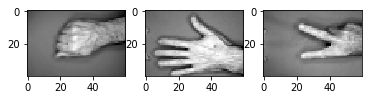

In [6]:
sample=[rock[10],paper[10],scissors[10]]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(sample[i],cmap='gray')

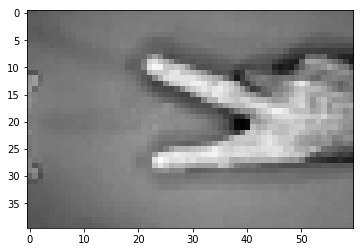

In [7]:
plt.imshow(scissors[10],cmap='gray')

In [8]:
data=[]
target=[]
for i in rock:
    data.append(i)
    target.append(0)
for i in paper:
    data.append(i)
    target.append(1)
for i in scissors:
    data.append(i)
    target.append(2)

In [9]:
print(rock[20].shape)

(40, 60)


In [10]:
x_train,x_test,y_train,y_test=train_test_split(data,target)

In [11]:
type(x_train)

list

In [12]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [13]:
print(x_train.shape,x_test.shape,sep="\n")

(1641, 40, 60)
(547, 40, 60)


In [14]:
print(40*60)

2400


In [15]:
x_train=x_train.reshape((1641,2400))
x_test=x_test.reshape((547,2400))

In [16]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [17]:
x_train/=255
x_test/=255

In [18]:
y_train=keras.utils.to_categorical(y_train,3)
y_test=keras.utils.to_categorical(y_test,3)

In [19]:
print(x_train.shape,x_test.shape,sep="\n")

(1641, 2400)
(547, 2400)


In [20]:
model=Sequential()
model.add(Dense(1024,input_shape=(2400,),activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              2458624   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total para

In [22]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
h=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Train on 1641 samples, validate on 547 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1641/1641 [==============================] - 3s 2ms/sample - loss: 1.8085 - acc: 0.5064 - val_loss: 0.1995 - val_acc: 1.0000
Epoch 2/5
1641/1641 [==============================] - 2s 1ms/sample - loss: 0.0141 - acc: 1.0000 - val_loss: 3.2024e-05 - val_acc: 1.0000
Epoch 3/5
1641/1641 [==============================] - 2s 1ms/sample - loss: 0.1782 - acc: 0.9854 - val_loss: 0.7268 - val_acc: 0.3346
Epoch 4/5
1641/1641 [==============================] - 2s 1ms/sample - loss: 0.0228 - acc: 0.9872 - val_loss: 6.2346e-06 - val_acc: 1.0000
Epoch 5/5
1641/1641 [==============================] - 2s 1ms/sample - loss: 8.2069e-06 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000


In [24]:
model.evaluate(x_test,y_test)

547/547 [==============================] - 0s 241us/sample - loss: 1.1921e-07 - acc: 1.0000


[1.1920928955078125e-07, 1.0]

In [25]:
model.predict(x_test[10:20])

array([[9.9999988e-01, 6.1430221e-08, 4.9537785e-08],
       [9.9999988e-01, 6.1430221e-08, 4.9537785e-08],
       [9.8196665e-08, 4.1416985e-08, 9.9999988e-01],
       [9.9999988e-01, 6.1430221e-08, 4.9537785e-08],
       [9.8196665e-08, 4.1416985e-08, 9.9999988e-01],
       [9.9999988e-01, 6.1430221e-08, 4.9537785e-08],
       [1.7340382e-08, 1.0000000e+00, 3.4774242e-08],
       [9.8196665e-08, 4.1416985e-08, 9.9999988e-01],
       [1.7340382e-08, 1.0000000e+00, 3.4774242e-08],
       [9.8196665e-08, 4.1416985e-08, 9.9999988e-01]], dtype=float32)

In [26]:
print(y_test[10:20])

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [27]:
model.save('G:/path/train_model.h5')